## Create ROOT file from `ASTERIA` simulation

In [10]:
from astropy.utils.exceptions import AstropyDeprecationWarning
from asteria import set_rcparams
from asteria.simulation import Simulation
from snewpy.neutrino import Flavor

import matplotlib.pyplot as plt
import astropy.units as u

import numpy as np
import uproot
import os
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, AstropyDeprecationWarning))

## Set up Plotting Defaults

In [11]:
set_rcparams()

## Set up and Run a Model

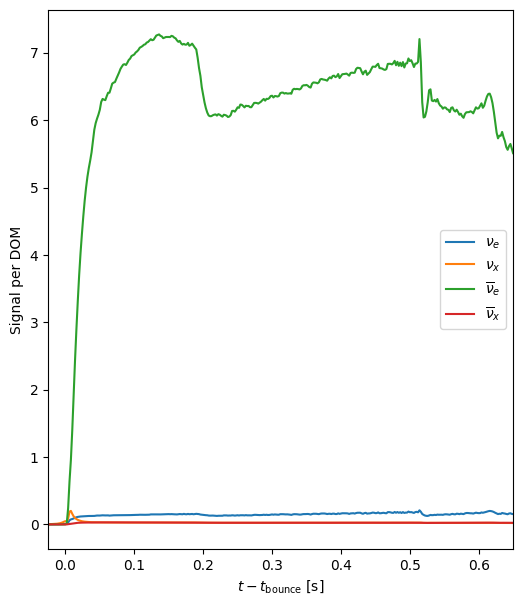

In [9]:
model = {
    'name': 'Sukhbold_2015',
    'param':{
        'progenitor_mass': 27*u.Msun,
        'eos': 'LS220'}
}

Emin=0*u.MeV; Emax=100*u.MeV; dE=1*u.MeV
tmin=-1*u.s;  tmax=10*u.s;    dt=2*u.ms
         
params = {
    'model': model,
    'distance':1*u.kpc, 
    'Emin':0*u.MeV, 'Emax':100*u.MeV, 'dE':1*u.MeV,
    'tmin':-1*u.s, 'tmax':10*u.s, 'dt':2*u.ms,
    'mixing_scheme':'AdiabaticMSW',
    'hierarchy':'normal'
    
}

sim = Simulation(**params)
sim.run()

time = np.append(sim.time, sim.time[-1] + sim._sim_dt)

fig, ax = plt.subplots(1, figsize = (6,7))
for flavor in sim.flavors:
    ax.plot(sim.time, sim.avg_dom_signal(flavor=flavor), label=flavor.to_tex())
ax.legend()
ax.set(xlabel=r'$t-t_\mathrm{bounce}$ [s]', ylabel='Signal per DOM', xlim=(-0.025, 0.65));

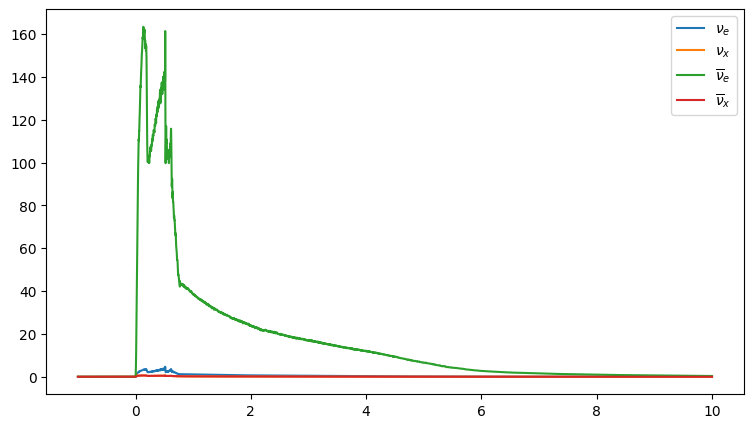

In [7]:
fig, ax = plt.subplots(1, figsize=(9,5))

for flavor in Flavor:
    ax.plot(sim.time, sim.E_per_V[flavor], label=flavor.to_tex())
ax.legend();

### Create ROOT file

Create `np.histogram`, using the simulation time binning and total signal per DOM. Create ROOT file using histogram.

In [4]:
outfile = 'Sukhbold_s27_LS220.root'
with uproot.recreate(outfile) as file:
    # file['total_photonic_energy_distance_1kpc'] = np.histogram(sim.time.value, bins=time.value, weights=sim.total_E_per_V.value)
    file['version'] = '1.2'

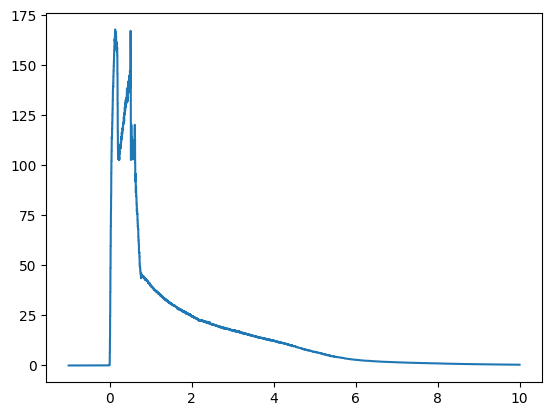

In [6]:
variable = np.histogram(sim.time.value, bins=time.value, weights=sim.total_E_per_V.value)
plt.step(variable[1][:-1], variable[0])